In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew

# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#sklearn modules for Model Selection:
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
import datetime
from time import time
from dateutil.parser import parse

In [3]:
df = pd.read_csv("/content/drive/MyDrive/takehome_ds_written.csv") # to be replaced by the csv path

In [4]:
df.head(50)

,Unnamed: 0,merchant,time,amount_usd_in_cents
0,1,faa029c6b0,2034-06-17 23:34:14,6349
1,2,ed7a7d91aa,2034-12-27 00:40:38,3854
2,3,5608f200cf,2034-04-30 01:29:42,789
3,4,15b1a0d61e,2034-09-16 01:06:23,4452
4,5,4770051790,2034-07-22 16:21:42,20203
5,6,3fc4f08d9d,2034-08-12 10:54:48,6190
6,7,1c8b539073,2033-03-10 18:46:49,715
7,8,77f961f9b3,2034-12-09 21:27:18,7211
8,9,9cb79b7700,2034-03-27 23:01:13,23267
9,10,2f95149dc3,2034-01-24 21:17:22,2572


In [5]:
df.describe()

,Unnamed: 0,amount_usd_in_cents
count,1.513719e+06,1.513719e+06
mean,7.568600e+05,1.548466e+04
std,4.369732e+05,6.161886e+04
min,1.000000e+00,2.010000e+02
25%,3.784305e+05,3.215000e+03
50%,7.568600e+05,6.104000e+03
75%,1.135290e+06,1.260600e+04
max,1.513719e+06,2.592028e+07


In [6]:
grouped_df = df.groupby('merchant')
grouped_df.first()
grouped_df.get_group('ffec05edb9')

,Unnamed: 0,merchant,time,amount_usd_in_cents
477523,477524,ffec05edb9,2034-01-25 20:14:36,5218
1155160,1155161,ffec05edb9,2034-02-14 22:34:54,5218
1203884,1203885,ffec05edb9,2034-01-28 17:39:08,5498


In [7]:
# splitting timestamp into different fields
df['date'] = pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time

last_transaction_timestamp = df['date'].max()

In [8]:
df.head()

,Unnamed: 0,merchant,time,amount_usd_in_cents,date
0,1,faa029c6b0,23:34:14,6349,2034-06-17
1,2,ed7a7d91aa,00:40:38,3854,2034-12-27
2,3,5608f200cf,01:29:42,789,2034-04-30
3,4,15b1a0d61e,01:06:23,4452,2034-09-16
4,5,4770051790,16:21:42,20203,2034-07-22


In [9]:
df = df.drop(['Unnamed: 0'], axis=1)

In [10]:
# calculating churned users every quarter for 2033 and 2034
q1ActiveUsers = df[(df['date'] >= datetime.date(2033, 1, 1)) & \
   (df['date'] <= datetime.date(2033, 3, 31))]['merchant'].unique()

q2ActiveUsers = df[(df['date'] >= datetime.date(2033, 4, 1)) & \
   (df['date'] <= datetime.date(2033, 6, 30))]['merchant'].unique()

q1ActiveUsersSet = set(list(q1ActiveUsers))
q2ActiveUsersSet = set(list(q2ActiveUsers))

churnedUsersFromQ1 = (q1ActiveUsersSet.difference(q2ActiveUsersSet))

q3ActiveUsersSet = set(list(df[(df['date'] >= datetime.date(2033, 7, 1)) & \
   (df['date'] <= datetime.date(2033, 9, 30))]['merchant'].unique()))

churnedUsersFromQ1Q2 = q1ActiveUsersSet.union(q2ActiveUsersSet).difference(q3ActiveUsersSet)

q4ActiveUsersSet = set(list(df[(df['date'] >= datetime.date(2033, 10, 1)) & \
   (df['date'] <= datetime.date(2033, 12, 31))]['merchant'].unique()))

churnedUsersFromQ1Q2Q3 = q1ActiveUsersSet.union(q2ActiveUsersSet).union(q3ActiveUsersSet).difference(q4ActiveUsersSet)


In [16]:
# number of churned users at the end of every quarter of 2033
print(f"Number of churned users in Q1 of 2033 is {len(churnedUsersFromQ1)}")
print(f"Number of churned users in Q2 of 2033 is {len(churnedUsersFromQ1Q2)}")
print(f"Number of churned users in Q3 of 2033 is {len(churnedUsersFromQ1Q2Q3)}")

Number of churned users in Q1 of 2033 is 441
Number of churned users in Q2 of 2033 is 1169
Number of churned users in Q3 of 2033 is 1988


In [12]:
# total active users in 2033
len(q1ActiveUsersSet.union(q2ActiveUsersSet).union(q3ActiveUsersSet).union(q4ActiveUsersSet))

6361

In [13]:
q21ActiveUsers = df[(df['date'] >= datetime.date(2034, 1, 1)) & \
   (df['date'] <= datetime.date(2034, 3, 31))]['merchant'].unique()

q22ActiveUsers = df[(df['date'] >= datetime.date(2034, 4, 1)) & \
   (df['date'] <= datetime.date(2034, 6, 30))]['merchant'].unique()

q21ActiveUsersSet = set(list(q21ActiveUsers))
q22ActiveUsersSet = set(list(q22ActiveUsers))

activeUsersSet2033 = q1ActiveUsersSet.union(q2ActiveUsersSet).union(q3ActiveUsersSet).union(q4ActiveUsersSet)
churnedUsersFrom2Q1 = activeUsersSet2033.union(q21ActiveUsersSet).difference(q22ActiveUsersSet)

q23ActiveUsersSet = set(list(df[(df['date'] >= datetime.date(2034, 7, 1)) & \
   (df['date'] <= datetime.date(2034, 9, 30))]['merchant'].unique()))

churnedUsersFrom2Q1Q2 = activeUsersSet2033.union(q21ActiveUsersSet).union(q22ActiveUsersSet).difference(q23ActiveUsersSet)

q24ActiveUsersSet = set(list(df[(df['date'] >= datetime.date(2034, 10, 1)) & \
   (df['date'] <= datetime.date(2034, 12, 31))]['merchant'].unique()))

churnedUsersFrom2Q1Q2Q3 = activeUsersSet2033.union(q21ActiveUsersSet).union(q22ActiveUsersSet).union(q23ActiveUsersSet).difference(q24ActiveUsersSet)

In [17]:
# number of churned users at the end of every quarter of 2034
print(f"Number of churned users in Q1 of 2034 is {len(churnedUsersFrom2Q1)}")
print(f"Number of churned users in Q2 of 2034 is {len(churnedUsersFrom2Q1Q2)}")
print(f"Number of churned users in Q3 of 2034 is {len(churnedUsersFrom2Q1Q2Q3)}")

Number of churned users in Q1 of 2034 is 3741
Number of churned users in Q2 of 2034 is 4845
Number of churned users in Q3 of 2034 is 5845
3741 4845 5845


In [18]:
print(len(q21ActiveUsersSet.union(q22ActiveUsersSet).union(q23ActiveUsersSet).union(q24ActiveUsersSet))) # total active users in 2034
print(len(activeUsersSet2033.union(q21ActiveUsersSet).union(q22ActiveUsersSet).union(q23ActiveUsersSet).union(q24ActiveUsersSet))) # total active users for 2033 and 2034

12454
14351


In [19]:
# computing the users churned in 2 years
churnSetList = [churnedUsersFromQ1, churnedUsersFromQ1Q2, churnedUsersFromQ1Q2Q3, churnedUsersFrom2Q1, churnedUsersFrom2Q1Q2, churnedUsersFrom2Q1Q2Q3]
totalChurnedUsers = churnSetList[0].intersection(*churnSetList)
print(totalChurnedUsers)
print(f"Total churned users over 2 years {len(totalChurnedUsers)}")

{'a4aace9f1d', '57fae45053', 'a1efbb4b3a', '87828bdcfb', '5d432730df', '833f9e6348', '0e31f264a4', '43d16a67bf', 'c97dd0db40', '29fc0b5c69', '8d1f46c326', 'e4683802cb', '2783dae4ea', 'fa3f979677', 'dda5cfe00a', 'cc86c88b97', 'af6c248f9c', 'd635cdee38', '31469e1e8c', '79a7e77b26', 'e9da792e9c', '23c27a3955', 'e956443ebf', 'e3a87f845f', '6becfd3ad2', '92e8f9513e', 'ad2682ca71', '6e5870b4c4', '8d9f148cda', '1b06434c16', '3aea10e70e', '23fbfc4509', '234b6ec776', 'c4e71ca44b', '2f5d23d8b6', '4bf7416288', '3839c43c25', '7b3d86d792', 'a4ad0f33d7', '5803b7d659', 'f939acdba5', 'eb3cf2c243', 'be375abbcb', '54e8a1c2a9', 'fd11709ba3', '0fb349c6db', '155bf65c78', '1a7f80214a', '6e96b527cd', 'e6ea09cba0', 'da6cfe45f3', 'a5dc4a5967', '2ec1ab95d8', '6226926162', 'a2d504241d', 'e9ae8fafd7', 'c550d62927', '224a374b1e', '68c30569a2', '33b9fa9763', '4a3c4ca1b1', '21ce4a8224', 'e2c201671c', '142a17d8e3', '222e5f71c2', '4266d8918f', '13ec1539dd', 'b8fe5e4bb2', '209a811e7c', '6af3314454', 'ced0183380', '7f3d

In [20]:
# percentage of churned users
len(totalChurnedUsers) / len(df['merchant'].unique()) * 100
# 229 / 14351 * 100

1.5957076161939934

In [21]:
df['churned'] = np.where(df["merchant"].isin(list(totalChurnedUsers)), "yes", "no")

In [22]:
df

,merchant,time,amount_usd_in_cents,date,churned
0,faa029c6b0,23:34:14,6349,2034-06-17,no
1,ed7a7d91aa,00:40:38,3854,2034-12-27,no
2,5608f200cf,01:29:42,789,2034-04-30,no
3,15b1a0d61e,01:06:23,4452,2034-09-16,no
4,4770051790,16:21:42,20203,2034-07-22,no
...,...,...,...,...,...
1513714,72d37bedbf,13:47:51,5274,2034-06-21,no
1513715,5608f200cf,02:23:59,754,2034-04-20,no
1513716,fcbd1dae68,14:02:33,13203,2033-09-19,no
1513717,9843e52410,20:07:59,4845,2034-12-28,no


In [23]:
# preprocessing features for model compatibility
df['date'] = df['date'].astype(str)
df[["year", "month", "day"]] = df["date"].str.split("-", expand = True)
encoder = LabelEncoder()
df['merchant_encoded'] = encoder.fit_transform(df['merchant'])

In [24]:
# used the 80-20 split to get the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop(['churned','merchant','time','date'], axis=1), df['churned'],stratify=df['churned'], test_size = 0.2, random_state = 0)

In [25]:
# smoting, to resolve class imbalance of churned users
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['churned'])

In [26]:
print("length of oversampled data is ",len(os_data_X))
print("Number of churned users in oversampled data",len(os_data_y[os_data_y['churned']=='yes']))
print("Number of active users",len(os_data_y[os_data_y['churned']=='no']))
print("Proportion of churned user data in oversampled data is ",len(os_data_y[os_data_y['churned']=='yes'])/len(os_data_X))
print("Proportion of active user data in oversampled data is ",len(os_data_y[os_data_y['churned']=='no'])/len(os_data_X))

length of oversampled data is  2412660
Number of churned users in oversampled data 1206330
Number of active users 1206330
Proportion of churned user data in oversampled data is  0.5
Proportion of active user data in oversampled data is  0.5


In [27]:
# model creation and testing 
def getConfusionMatrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred) 
  df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
  plt.figure(figsize = (28,20))
  fig, ax = plt.subplots()
  sn.set(font_scale=1.4)
  sn.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
  class_names=[0,1]
  tick_marks = np.arange(len(class_names))
  plt.tight_layout()
  plt.title('Confusion matrix\n', y=1.1)
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  ax.xaxis.set_label_position("top")
  plt.ylabel('Actual label\n')
  plt.xlabel('Predicted label\n')


def createModels(os_data_X, os_data_y, X_test, y_test, model):
  if model == 'LogisticRegression':
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(os_data_X, os_data_y)
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    #Evaluate results
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label="yes")
    rec = recall_score(y_test, y_pred, pos_label="yes")
    f1 = f1_score(y_test, y_pred, pos_label="yes")
    f2 = fbeta_score(y_test, y_pred, beta=2.0, pos_label="yes")
    results = pd.DataFrame([['Logistic Regression', 
    acc, prec, rec, f1, f2]], columns = ['Model', 
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 
    'F2 Score'])

  elif model == 'KNeighbors':
    classifier = KNeighborsClassifier(
    n_neighbors = 5, 
    metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    # Predicting the Test set results 
    y_pred  = classifier.predict(X_test)
    #Evaluate results
    acc = accuracy_score(y_test, y_pred )
    prec = precision_score(y_test, y_pred, pos_label="yes")
    rec = recall_score(y_test, y_pred, pos_label="yes")
    f1 = f1_score(y_test, y_pred, pos_label="yes")
    f2 = fbeta_score(y_test, y_pred, beta=2.0, pos_label="yes")
    results = pd.DataFrame([['K-Nearest Neighbours', 
    acc, prec, rec, f1, f2]], columns = ['Model', 
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 
    'F2 Score'])

  elif model == 'GaussianNB':
    classifier = GaussianNB()
    classifier.fit(os_data_X, os_data_y)
    # Predicting the Test set results 
    y_pred = classifier.predict(X_test)
    #Evaluate results
    acc = accuracy_score(y_test, y_pred )
    prec = precision_score(y_test, y_pred, pos_label="yes")
    rec = recall_score(y_test, y_pred, pos_label="yes")
    f1 = f1_score(y_test, y_pred, pos_label="yes")
    f2 = fbeta_score(y_test, y_pred, beta=2.0, pos_label="yes")
    results = pd.DataFrame([['Naive Bayes', 
    acc, prec, rec, f1, f2]], columns = ['Model', 
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 
    'F2 Score'])

  elif model == 'DecisionTree':
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(os_data_X, os_data_y)
    # Predicting the Test set results 
    y_pred = classifier.predict(X_test)
    #Evaluate results
    acc = accuracy_score(y_test, y_pred )
    prec = precision_score(y_test, y_pred, pos_label="yes")
    rec = recall_score(y_test, y_pred, pos_label="yes")
    f1 = f1_score(y_test, y_pred, pos_label="yes")
    f2 = fbeta_score(y_test, y_pred, beta=2.0, pos_label="yes")
    results = pd.DataFrame([['Decision Trees', 
    acc, prec, rec, f1, f2]], columns = ['Model', 
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 
    'F2 Score'])

  results = results.sort_values(["Precision","Recall", "F2 Score"], ascending = False)
  print(results)
  getConfusionMatrix(y_test, y_pred)
  return results

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.845642   0.024202  0.998277  0.047259  0.110314
                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  K-Nearest Neighbours  0.997457   0.770401  0.479759  0.591295  0.518912


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Naive Bayes  0.746086   0.014605  0.981051  0.028781   0.06892
            Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Decision Trees  0.999069   0.833207  0.946598   0.88629  0.921516


,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Decision Trees,0.999069,0.833207,0.946598,0.88629,0.921516


<Figure size 2016x1440 with 0 Axes>

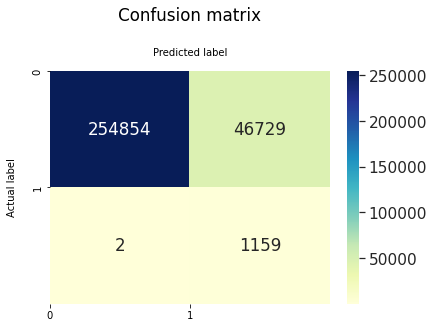

<Figure size 2016x1440 with 0 Axes>

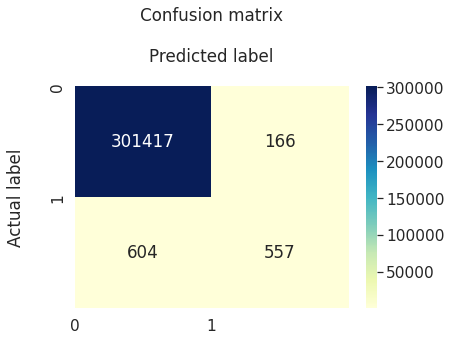

<Figure size 2016x1440 with 0 Axes>

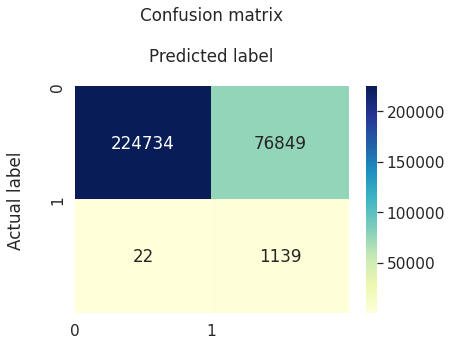

<Figure size 2016x1440 with 0 Axes>

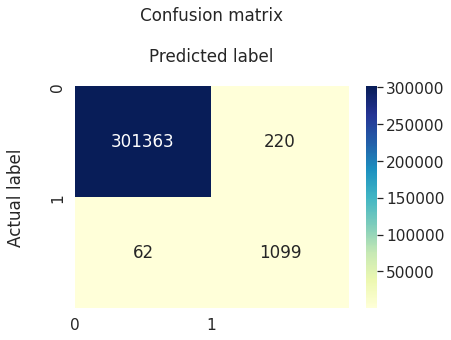

In [28]:
createModels(os_data_X, os_data_y, X_test, y_test, 'LogisticRegression')
createModels(os_data_X, os_data_y, X_test, y_test, 'KNeighbors')
createModels(os_data_X, os_data_y, X_test, y_test, 'GaussianNB')
createModels(os_data_X, os_data_y, X_test, y_test, 'DecisionTree')

In [29]:
# K-Means to cluster merchants into categories
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(df.drop(['churned','merchant','time','date'], axis=1))

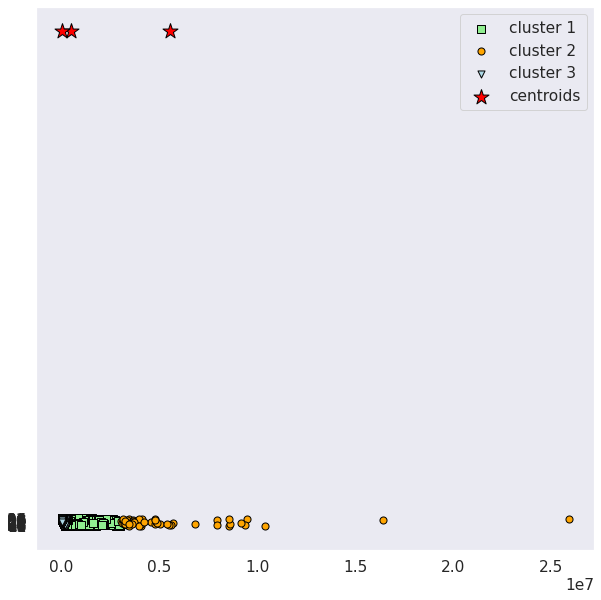

In [30]:
X=df[['amount_usd_in_cents','day','month','year','merchant_encoded']]
X = np.array(X)
plt.figure(figsize=(10,10))
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [31]:
df
X = df[['amount_usd_in_cents','day','month','year','merchant_encoded']]

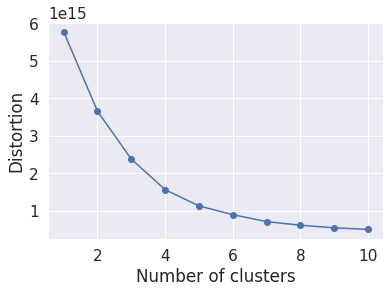

In [32]:
# elbow method to determine the right value of k
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [33]:
# exploring the instances with each cluster
centroid1_df = X[km.labels_==0]
centroid2_df = X[km.labels_==1]
centroid3_df = X[km.labels_==2]

print(centroid1_df.describe(include="all"))
print(centroid2_df.describe(include="all"))
print(centroid3_df.describe(include="all"))

        amount_usd_in_cents  day month  year  merchant_encoded
count          2.050000e+02  205   205   205        205.000000
unique                  NaN   31    12     2               NaN
top                     NaN   28    12  2034               NaN
freq                    NaN   11    30   161               NaN
mean           1.873375e+06  NaN   NaN   NaN       6742.468293
std            3.419194e+05  NaN   NaN   NaN       3940.601121
min            1.464667e+06  NaN   NaN   NaN         64.000000
25%            1.611101e+06  NaN   NaN   NaN       3285.000000
50%            1.775435e+06  NaN   NaN   NaN       6622.000000
75%            2.057179e+06  NaN   NaN   NaN       9902.000000
max            2.898652e+06  NaN   NaN   NaN      14294.000000
        amount_usd_in_cents    day  month   year  merchant_encoded
count          14336.000000  14336  14336  14336      14336.000000
unique                  NaN     31     12      2               NaN
top                     NaN     01     12  

In [34]:
centroids  = km.cluster_centers_ 

In [35]:
centroids

array([[1.87337479e+06, 1.53512195e+01, 7.42439024e+00, 2.03378537e+03,
        6.74246829e+03],
       [1.77027303e+05, 1.49586616e+01, 7.53008017e+00, 2.03377574e+03,
        7.23291760e+03],
       [2.99061517e+04, 1.57593247e+01, 7.68033442e+00, 2.03373631e+03,
        7.28357411e+03],
       [5.95393145e+03, 1.56589858e+01, 7.48606957e+00, 2.03375679e+03,
        6.89885116e+03],
       [1.11090985e+07, 1.87272727e+01, 9.63636364e+00, 2.03400000e+03,
        9.30981818e+03],
       [3.98267493e+06, 1.69302326e+01, 7.83720930e+00, 2.03386047e+03,
        7.17197674e+03],
       [8.11042086e+04, 1.54865807e+01, 7.52710124e+00, 2.03374191e+03,
        7.26398906e+03],
       [3.38340404e+05, 1.46584168e+01, 7.64014928e+00, 2.03379454e+03,
        7.11219485e+03],
       [1.05045175e+06, 1.65540123e+01, 7.52160494e+00, 2.03376389e+03,
        7.34225926e+03],
       [5.92255570e+05, 1.57028539e+01, 7.59429211e+00, 2.03378120e+03,
        6.94836206e+03]])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a singl

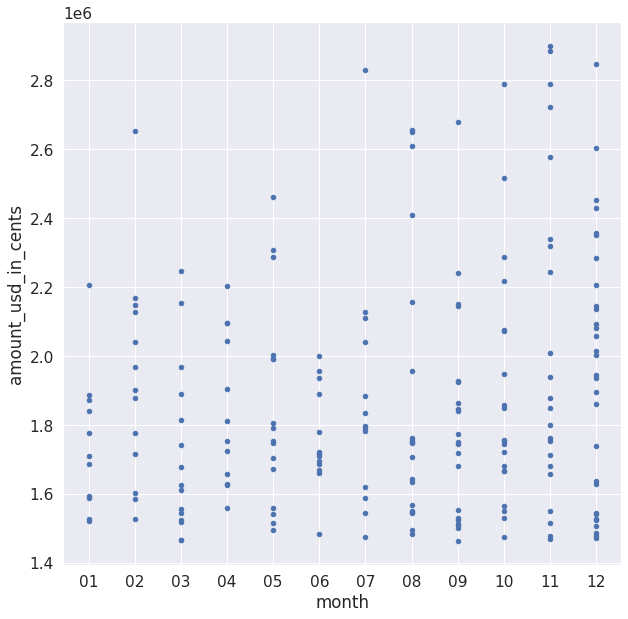

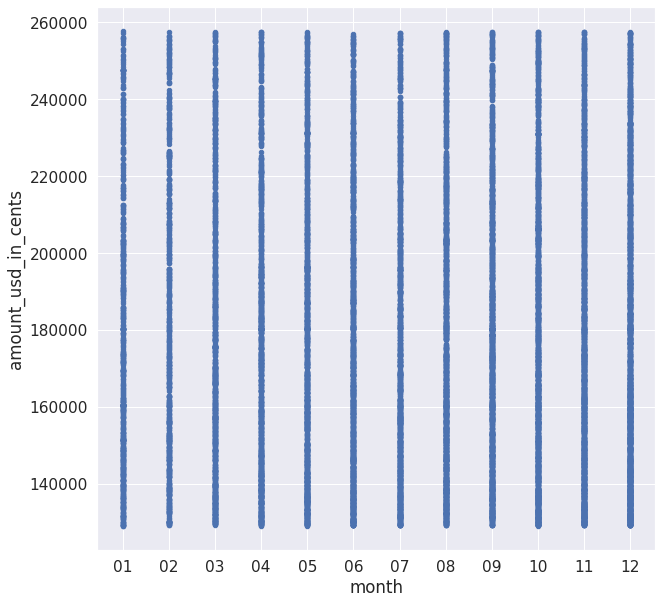

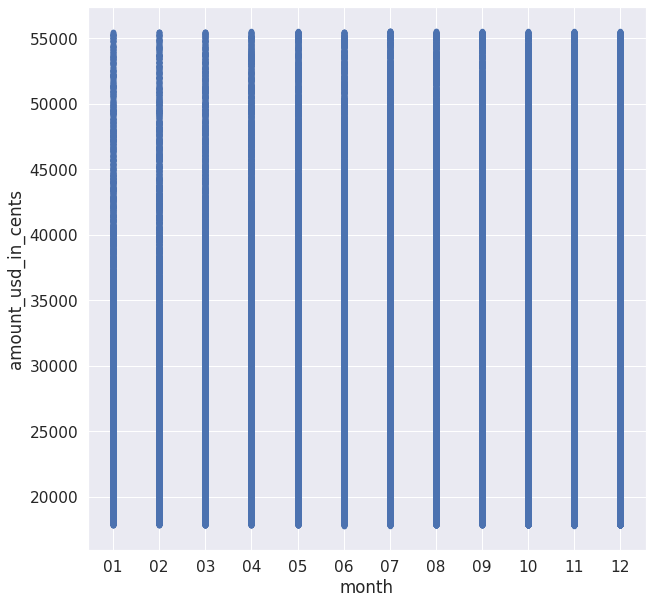

In [36]:
# visualizing amount using scatter plots per cluster per month

def getScatterPlot(centroid_df, x, y):
  centroid_df.sort_values(x, ascending=True, inplace=True)
  centroid_df.plot(x=x, y=y, kind="scatter",figsize=(10,10))

getScatterPlot(centroid1_df, "month", "amount_usd_in_cents")
getScatterPlot(centroid2_df, "month", "amount_usd_in_cents")
getScatterPlot(centroid3_df, "month", "amount_usd_in_cents")

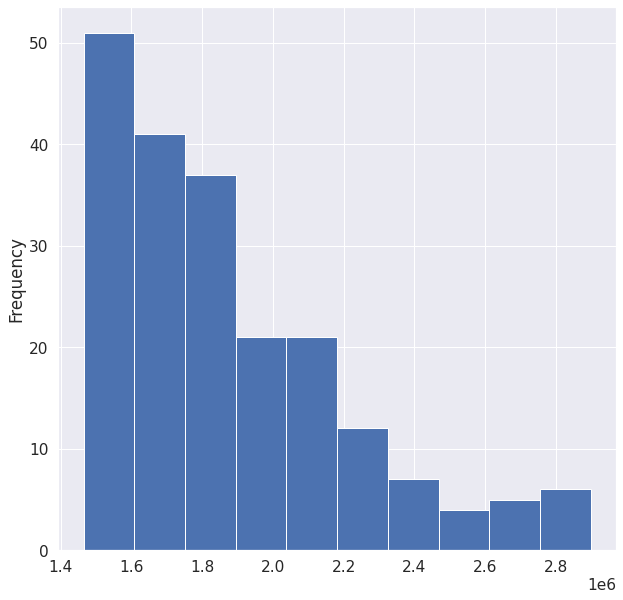

In [37]:
centroid1_df['amount_usd_in_cents'].plot.hist(figsize=(10,10), edgecolor='white')

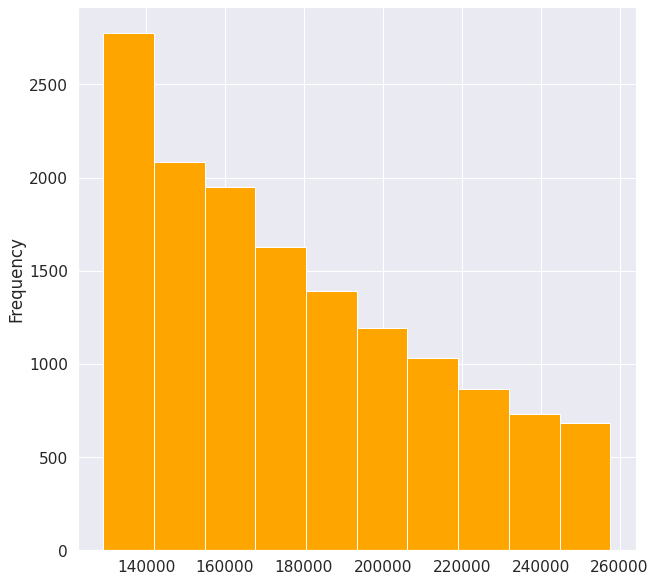

In [38]:
centroid2_df['amount_usd_in_cents'].plot.hist(figsize=(10,10), color="orange", edgecolor='white')

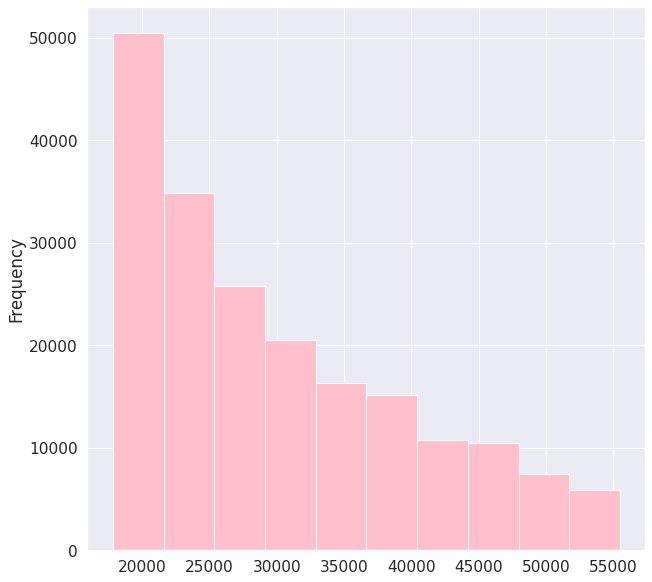

In [39]:
centroid3_df['amount_usd_in_cents'].plot.hist(figsize=(10,10), color="pink", edgecolor='white')

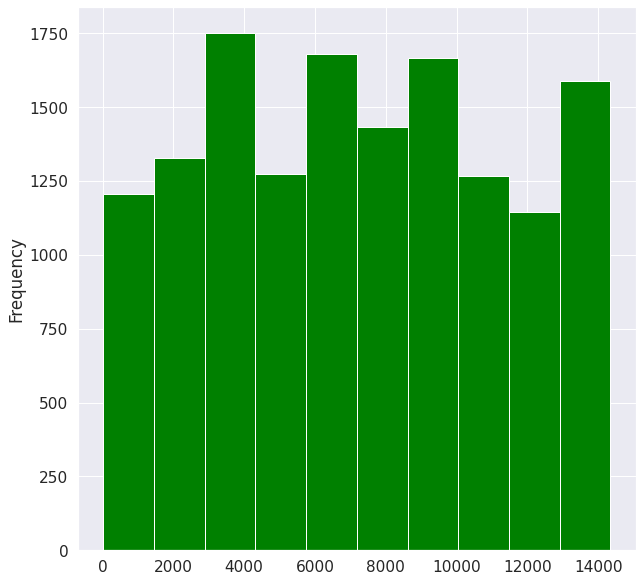

In [40]:
centroid2_df['merchant_encoded'].plot.hist(figsize=(10,10), color="green", edgecolor='white')

In [41]:
centroid1_df.groupby('merchant_encoded').first()

,amount_usd_in_cents,day,month,year
merchant_encoded,,,,
64,1642386,05,08,2034
139,1705512,10,05,2034
286,2408351,10,08,2033
610,1680426,12,09,2034
664,1502180,06,09,2034
...,...,...,...,...
13872,1935260,14,12,2034
13905,1526002,09,01,2034
14058,1763338,28,08,2034


In [43]:
# centroid1_df.groupby('merchant_encoded').get_group(3863)
centroid1_df.groupby('merchant_encoded').get_group(5032)

,amount_usd_in_cents,day,month,year,merchant_encoded
790000,1790098,04,05,2034,5032


In [44]:
centroid2_df.groupby('merchant_encoded').first()

,amount_usd_in_cents,day,month,year
merchant_encoded,,,,
17,164577,18,08,2033
19,243899,06,12,2034
21,182467,12,04,2034
23,249069,26,05,2034
30,244658,03,08,2034
...,...,...,...,...
14314,147466,25,04,2034
14319,142224,01,07,2034
14328,181709,05,04,2034


In [45]:
centroid2_df.groupby('merchant_encoded').get_group(5372)

,amount_usd_in_cents,day,month,year,merchant_encoded
799181,245507,22,01,2034,5372
502687,183242,02,03,2034,5372
627541,171327,07,03,2034,5372
1194655,137126,27,03,2034,5372
1510906,208821,15,03,2034,5372
420241,188567,26,04,2034,5372
1422718,177089,03,04,2034,5372
1318892,139357,18,04,2034,5372
1018546,137675,09,05,2034,5372
255868,168437,11,05,2034,5372


In [46]:
centroid3_df.groupby('merchant_encoded').first()

,amount_usd_in_cents,day,month,year
merchant_encoded,,,,
1,37830,17,10,2034
5,31598,23,01,2034
6,22110,19,01,2034
9,34880,18,06,2033
10,40169,12,01,2034
...,...,...,...,...
14344,45839,21,02,2034
14345,21809,30,12,2034
14346,24637,06,01,2033


In [47]:
centroid3_df.groupby('merchant_encoded').get_group(6924).describe(include="all")

,amount_usd_in_cents,day,month,year,merchant_encoded
count,114.000000,114,114,114,114.0
unique,NaN,29,12,2,NaN
top,NaN,08,06,2034,NaN
freq,NaN,10,20,66,NaN
mean,24811.333333,NaN,NaN,NaN,6924.0
std,7270.027874,NaN,NaN,NaN,0.0
min,17946.000000,NaN,NaN,NaN,6924.0
25%,21691.000000,NaN,NaN,NaN,6924.0
50%,21691.000000,NaN,NaN,NaN,6924.0
75%,23509.750000,NaN,NaN,NaN,6924.0


In [48]:
centroid1_df.describe(include="all")

,amount_usd_in_cents,day,month,year,merchant_encoded
count,2.050000e+02,205,205,205,205.000000
unique,NaN,31,12,2,NaN
top,NaN,28,12,2034,NaN
freq,NaN,11,30,161,NaN
mean,1.873375e+06,NaN,NaN,NaN,6742.468293
std,3.419194e+05,NaN,NaN,NaN,3940.601121
min,1.464667e+06,NaN,NaN,NaN,64.000000
25%,1.611101e+06,NaN,NaN,NaN,3285.000000
50%,1.775435e+06,NaN,NaN,NaN,6622.000000
75%,2.057179e+06,NaN,NaN,NaN,9902.000000


In [49]:
centroid2_df.describe(include="all")

,amount_usd_in_cents,day,month,year,merchant_encoded
count,14336.000000,14336,14336,14336,14336.000000
unique,NaN,31,12,2,NaN
top,NaN,01,12,2034,NaN
freq,NaN,1471,1985,11120,NaN
mean,177147.126744,NaN,NaN,NaN,7230.556850
std,35328.242658,NaN,NaN,NaN,4030.788442
min,129076.000000,NaN,NaN,NaN,17.000000
25%,146598.000000,NaN,NaN,NaN,3863.000000
50%,170427.500000,NaN,NaN,NaN,7138.000000
75%,203294.000000,NaN,NaN,NaN,10807.000000


In [50]:
centroid3_df.describe(include="all")

,amount_usd_in_cents,day,month,year,merchant_encoded
count,197571.000000,197571,197571,197571,197571.000000
unique,NaN,31,12,2,NaN
top,NaN,21,11,2034,NaN
freq,NaN,10309,24663,145468,NaN
mean,29915.335910,NaN,NaN,NaN,7284.147233
std,9913.152594,NaN,NaN,NaN,4084.147443
min,17817.000000,NaN,NaN,NaN,1.000000
25%,21486.000000,NaN,NaN,NaN,3863.000000
50%,27092.000000,NaN,NaN,NaN,7135.000000
75%,36735.000000,NaN,NaN,NaN,10822.000000


In [51]:
centroid1Users = encoder.inverse_transform(centroid1_df['merchant_encoded']).tolist()
centroid2Users = encoder.inverse_transform(centroid2_df['merchant_encoded']).tolist()
centroid3Users = encoder.inverse_transform(centroid3_df['merchant_encoded']).tolist()

In [52]:
# total number of churned users within each cluster
print(f"Number of churned users in cluster 1 are {len(totalChurnedUsers.intersection(set(centroid1Users)))}")
print(f"Number of churned users in cluster 2 are {len(totalChurnedUsers.intersection(set(centroid2Users)))}")
print(f"Number of churned users in cluster 3 are {len(totalChurnedUsers.intersection(set(centroid3Users)))}")

Number of churned users in cluster 1 are 0
Number of churned users in cluster 2 are 20
Number of churned users in cluster 3 are 91


In [53]:
# unique users in cluster 3
len(centroid2_df['merchant_encoded'].unique())

2315

In [54]:
# unique users in cluster 3
len(centroid3_df['merchant_encoded'].unique())

8046

In [55]:
# unique users in cluster 1
len(set(centroid1_df['merchant_encoded']))

129